In [1]:
from smartdata import SmartspacesCSVAdapter
adapter = SmartspacesCSVAdapter()

In [2]:
datasets = [
    {'lbl': 'Queens', 'id': 4},
    {'lbl': 'Hugh Aston', 'id': 7},
    {'lbl': 'Kimberlin', 'id': 10},
    {'lbl': 'Campus Centre', 'id': 13},
    {'lbl': 'John Whitehead', 'id': 16}
]
for dataset in datasets:
    dataset['dataframe'] = adapter.dataframe(dataset['id'], 'all')
temperature = adapter.dataframe(1, 'all')

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

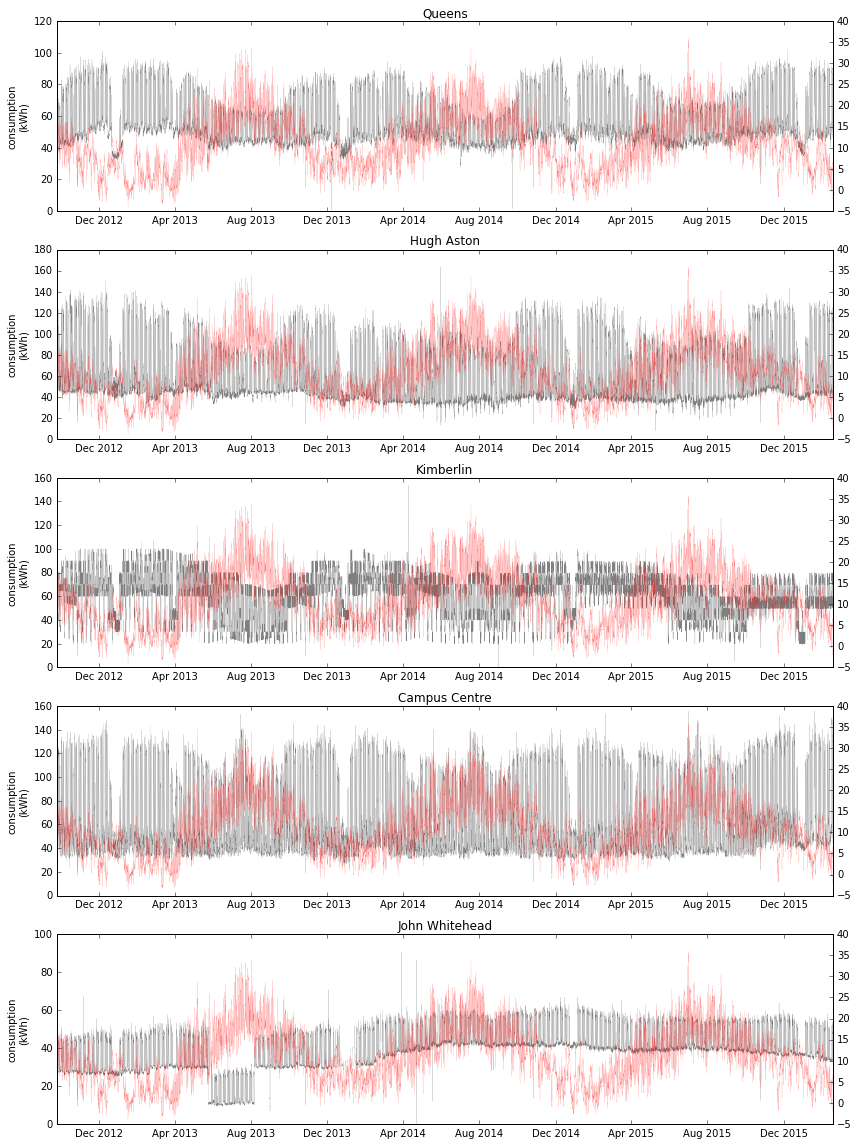

In [8]:
fig, axes = plt.subplots(5, 1, figsize=(12, 16))
for i, dataset in enumerate(datasets):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    ax2.plot(temperature.index, temperature, c="red", lw=0.15, alpha=0.5)
    ax1.plot(dataset['dataframe'].index, dataset['dataframe'], c="black", lw=0.15, alpha=0.5)
    ax1.set_title(dataset['lbl'])
    ax1.set_ylabel('consumption\n(kWh)')
plt.tight_layout()

In [14]:
import time
import numpy as np

In [17]:
for dataset in datasets:
    dataset['datetimes'] = dataset['dataframe'].index.tolist()
    dataset['timestamps'] = [time.mktime(t.timetuple()) for t in dataset['dataframe'].index.tolist()]
    dataset['consumption'] = dataset['dataframe'][dataset['dataframe'].columns[0]].tolist()
    dataset['data'] = np.array(
        list(zip(dataset['consumption'], temperature[temperature.columns[0]].tolist()
, dataset['timestamps'])), 
        dtype=[('value', 'int32'), ('temperature', 'int32'), ('timestamp', 'float')]
    )

In [18]:
from pyEMIS.models.weekly import Factory as WF
from pyEMIS.models.any import Factory as AF
from pyEMIS.models.constant import Factory as c
from pyEMIS.models.heating3 import Factory as h

In [19]:
factory = WF(c())
factory2 = WF(AF([c(), h()]))

In [20]:
for dataset in datasets:
    dataset['model'] = factory(dataset['data'][-17520+336:-336])
    dataset['preds'] = dataset['model'].prediction(dataset['data'])
    dataset['percs'] = {"P{}".format(p): dataset['model'].scoreatpercentile(dataset['data'], p) for p in [10, 25, 50, 75, 90]}

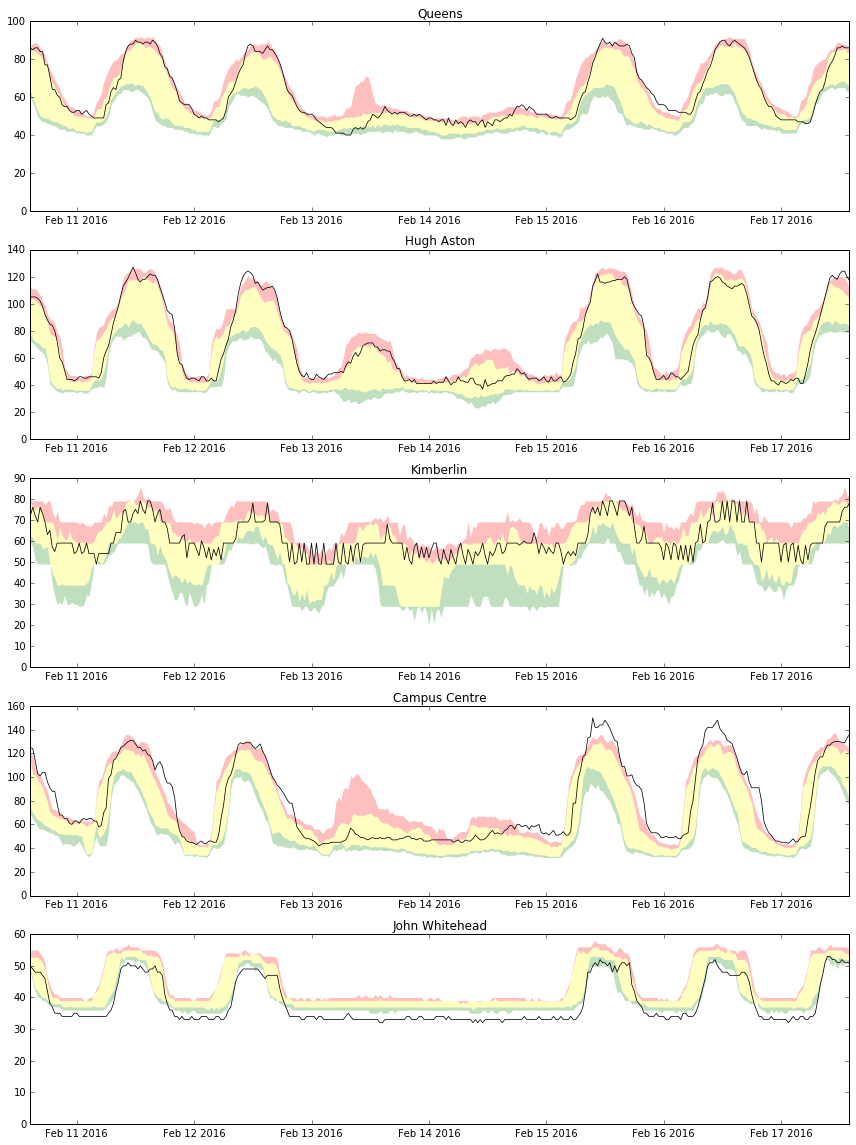

In [10]:
fig, axes = plt.subplots(5, 1, figsize=(12, 16))
for i, d in enumerate(datasets):
    ax = axes[i]
    ax.fill_between(d['datetimes'][-336:], d['percs']['P10'][-336:], d['percs']['P25'][-336:], color='green', lw=0, alpha=0.25)
    ax.fill_between(d['datetimes'][-336:], d['percs']['P25'][-336:], d['percs']['P75'][-336:], color='yellow', lw=0, alpha=0.25)
    ax.fill_between(d['datetimes'][-336:], d['percs']['P75'][-336:], d['percs']['P90'][-336:], color='red', lw=0, alpha=0.25)
    ax.plot(d['datetimes'][-336:], d['data'][-336:]['value'], color='black', lw=0.75)
    ax.set_ylim(ymin=0)
    ax.set_title(d['lbl'])
fig.tight_layout()

In [21]:
for dataset in datasets:
    dataset['model2'] = factory2(dataset['data'][-17520+336:-336])
    dataset['preds2'] = dataset['model'].prediction(dataset['data'])
    dataset['percs2'] = {"P{}".format(p): dataset['model'].scoreatpercentile(dataset['data'], p) for p in [10, 25, 50, 75, 90]}

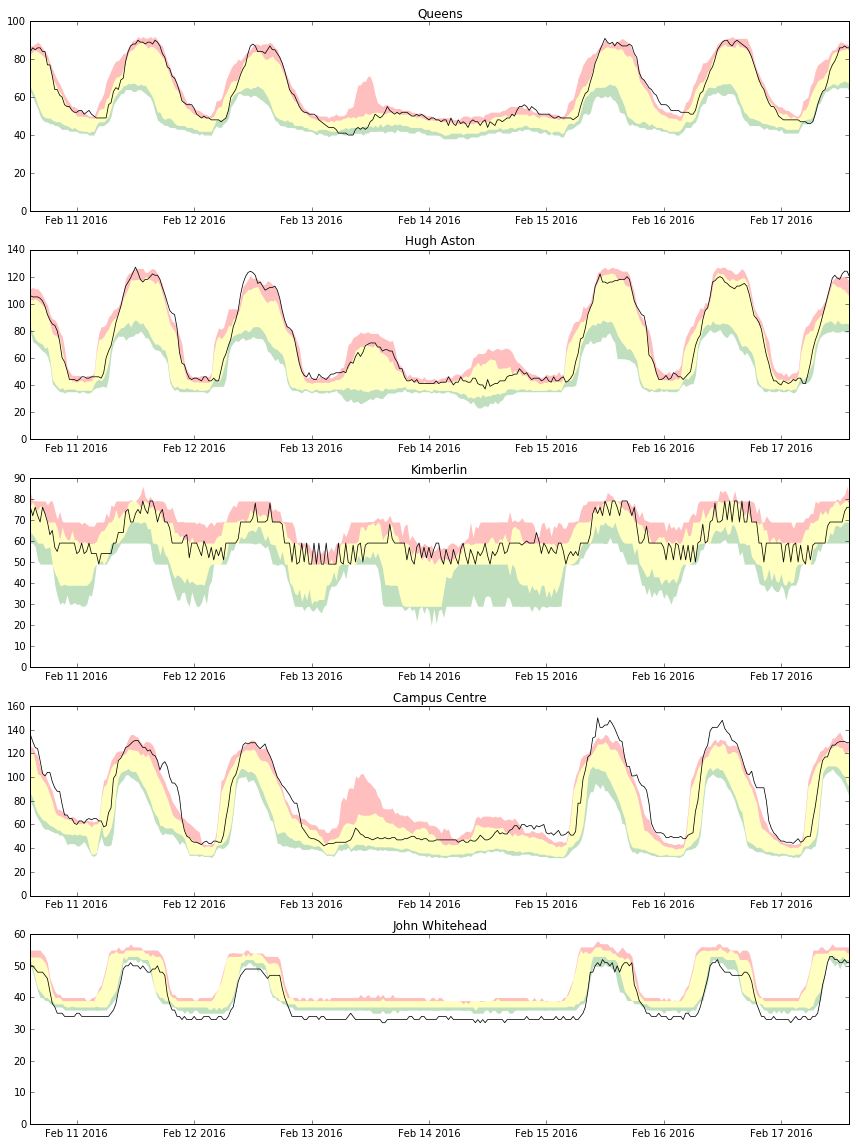

In [22]:
fig, axes = plt.subplots(5, 1, figsize=(12, 16))
for i, d in enumerate(datasets):
    ax = axes[i]
    ax.fill_between(d['datetimes'][-336:], d['percs2']['P10'][-336:], d['percs2']['P25'][-336:], color='green', lw=0, alpha=0.25)
    ax.fill_between(d['datetimes'][-336:], d['percs2']['P25'][-336:], d['percs2']['P75'][-336:], color='yellow', lw=0, alpha=0.25)
    ax.fill_between(d['datetimes'][-336:], d['percs2']['P75'][-336:], d['percs2']['P90'][-336:], color='red', lw=0, alpha=0.25)
    ax.plot(d['datetimes'][-336:], d['data'][-336:]['value'], color='black', lw=0.75)
    ax.set_ylim(ymin=0)
    ax.set_title(d['lbl'])
fig.tight_layout()